## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [85]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [86]:
a=-2
b=1

x=np.linspace(0,20)
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [87]:
y=a*x+b


print(y)


[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

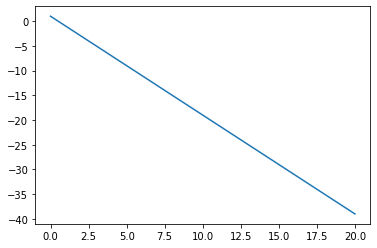

In [88]:
plt.plot(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

1. All predicted Theta_0 in all iterations.  theta0arr=[]
2. All predicted Theta_1 in all iterations.  theta1arr=[]
3. Corresponding loss for each Theta_0 and Theta_1 predictions.     lossarr=[]
4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.    harr=[]
5.Final Optimum values of Theta_0 and Theta_1      theta0,theta1

In [89]:
def Adagrad(x,y,learning_rate,epslon,Max_iterations):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        v0 = v0 + (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        v1 = v1 + (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1,h
    
        


In [90]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 ,h = Adagrad (x,y,0.8,1e-8,500)

#### Calculate r2 score

In [91]:
import sklearn
from sklearn.metrics import r2_score

In [92]:
sklearn.metrics.r2_score(h,y)

0.9984647009684924

#### Plot loss vs. epochs

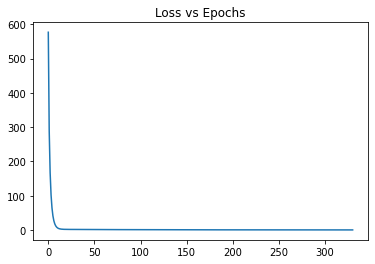

In [93]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

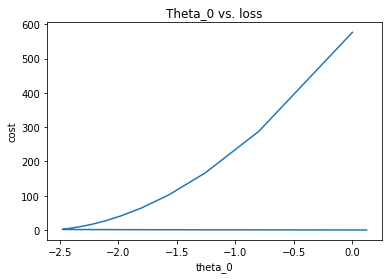

In [94]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

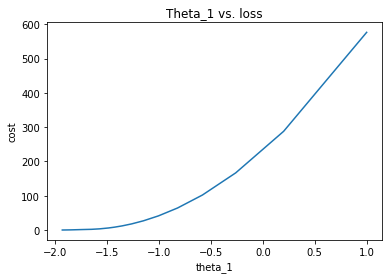

In [95]:
plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

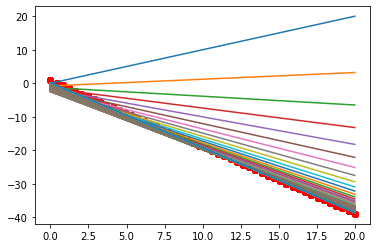

In [96]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

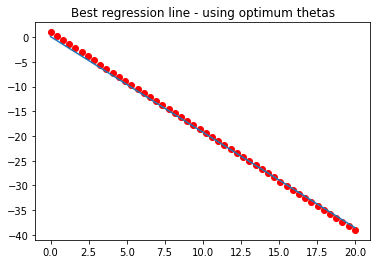

In [97]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

#### Try default learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [98]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 ,h = Adagrad (x,y,0.1,1e-8,1000)

#### Plot loss vs. epochs

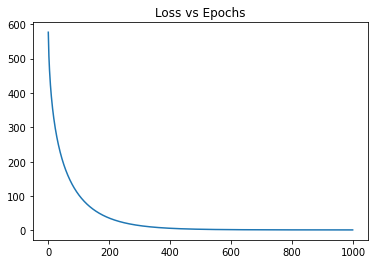

In [99]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

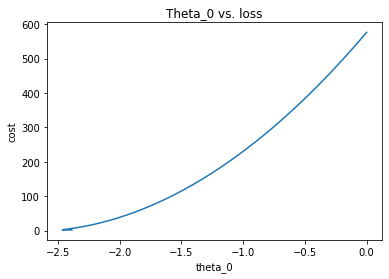

In [100]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

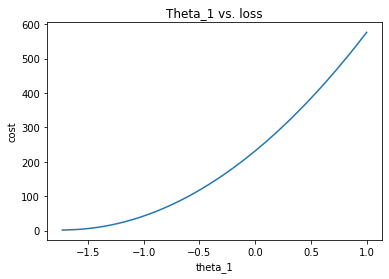

In [101]:
plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

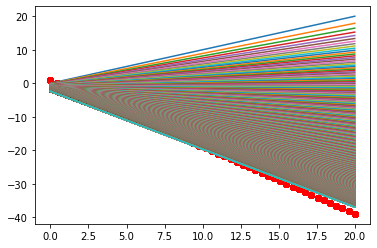

In [102]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

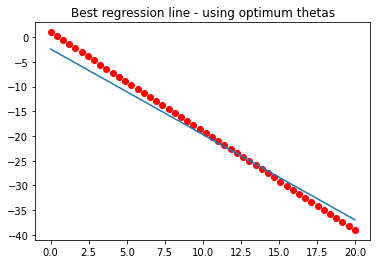

In [103]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [104]:
def RMSProp(x,y,learning_rate,epslon,Max_iterations,beta):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        v0 = beta * v0 + (1-beta) *(gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        v1 = beta * v1 + (1-beta) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1
    

In [105]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 = RMSProp(x,y,0.25,1e-8,130,0.98)

#### Calculate r2 score

In [106]:
import sklearn
from sklearn.metrics import r2_score

In [107]:
sklearn.metrics.r2_score(h,y)

0.9709462452520248

In [108]:
theta0arr

[0,
 -1.767766948656023,
 -2.3259978563231924,
 -2.507391838183567,
 -2.5449895414193247,
 -2.5271803840509497,
 -2.488405442059198,
 -2.4419316500183554,
 -2.392786185951125,
 -2.3428427856634233,
 -2.292789595951673,
 -2.2428770502280444,
 -2.193196951729943,
 -2.1437846895503907,
 -2.094655963362465,
 -2.045819718997952,
 -1.9972826118733142,
 -1.9490505139643868,
 -1.901129010511241,
 -1.853523558884056,
 -1.8062395369651585,
 -1.7592822562184607,
 -1.7126569637333042,
 -1.666368840905061,
 -1.6204230011116805,
 -1.5748244870951036,
 -1.5295782682559393,
 -1.484689237922027,
 -1.440162210609097,
 -1.3960019192799604,
 -1.352213012605515,
 -1.308800052230099,
 -1.265767510043578,
 -1.223119765462579,
 -1.1808611027233573,
 -1.138995708188842,
 -1.0975276676724977,
 -1.0564609637817048,
 -1.0157994732834397,
 -0.975546964495107,
 -0.935707094703448,
 -0.8962834076145187,
 -0.8572793308377961,
 -0.8186981734075358,
 -0.780543123344566,
 -0.7428172452617586,
 -0.7055234780164739,
 -0.6

In [109]:
theta1arr

[1,
 -0.767766952649175,
 -1.358419483160315,
 -1.5858474037752812,
 -1.6752381215259338,
 -1.7113916372654197,
 -1.7272522798096972,
 -1.735496126509077,
 -1.740922617920465,
 -1.7453173423186088,
 -1.74933254180998,
 -1.7532018961696,
 -1.7570073546745921,
 -1.76077690884869,
 -1.7645197384006752,
 -1.7682385980950486,
 -1.77193409555501,
 -1.7756061380162986,
 -1.7792544112309612,
 -1.7828785345820837,
 -1.7864781102726737,
 -1.790052738653515,
 -1.7936020229827632,
 -1.7971255709680534,
 -1.8006229953541273,
 -1.8040939142349794,
 -1.8075379512888325,
 -1.8109547359922096,
 -1.8143439038285405,
 -1.8177050964953227,
 -1.8210379621107609,
 -1.8243421554199923,
 -1.8276173380007907,
 -1.8308631784685838,
 -1.8340793526806038,
 -1.83726554393898,
 -1.8404214431925758,
 -1.843546749237367,
 -1.8466411689151543,
 -1.8497044173103943,
 -1.8527362179449283,
 -1.8557363029703862,
 -1.8587044133580328,
 -1.8616402990858236,
 -1.8645437193224275,
 -1.8674144426079735,
 -1.8702522470312741,
 

In [110]:
lossarr

[576.6224489795919,
 71.98440412697289,
 11.913897993484907,
 3.1764511460126768,
 1.8738011335353206,
 1.6504120968367821,
 1.579967547183717,
 1.5311508780132517,
 1.4859573540621462,
 1.4419998351328849,
 1.3989689873754834,
 1.3568218829364402,
 1.315548311205543,
 1.2751417291918734,
 1.235595784999646,
 1.1969039197188227,
 1.159059326953832,
 1.1220549528764021,
 1.0858835010057137,
 1.0505374377287733,
 1.016008998095632,
 0.9822901918221785,
 0.9493728094839982,
 0.9172484288931617,
 0.88590842165144,
 0.8553439598736956,
 0.8255460230750231,
 0.7965054052149827,
 0.7682127218919846,
 0.7406584176805725,
 0.7138327736041147,
 0.687725914735098,
 0.6623278179149706,
 0.6376283195852268,
 0.6136171237211405,
 0.5902838098593651,
 0.5676178412103324,
 0.5456085728461958,
 0.5242452599548512,
 0.5035170661503555,
 0.4834130718299058,
 0.4639222825673475,
 0.44503363753305797,
 0.4267360179298847,
 0.40901825543472087,
 0.39186914063519446,
 0.37527743145085224,
 0.3592318615281641

In [111]:
harr

[array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
         6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
         8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
        10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
        12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
        14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
        16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
        18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ]),
 array([ -1.76776695,  -2.08114122,  -2.39451548,  -2.70788975,
         -3.02126401,  -3.33463828,  -3.64801255,  -3.96138681,
         -4.27476108,  -4.58813535,  -4.90150961,  -5.21488388,
         -5.52825815,  -5.84163241,  -6.15500668,  -6.46838094,
         -6.

In [112]:
theta0

0.15569231019844712

In [113]:
 theta1

-1.9357755840131747

#### Plot loss vs. epochs

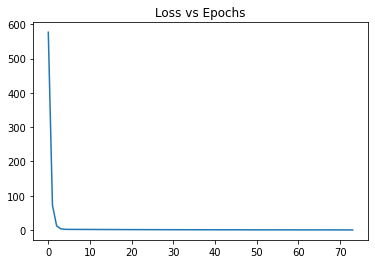

In [114]:

plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

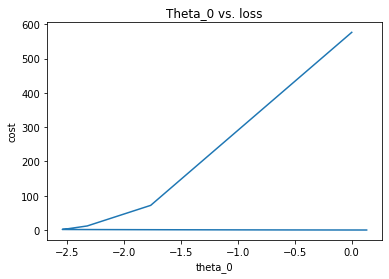

In [115]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

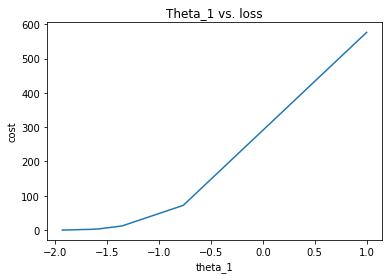

In [116]:

plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

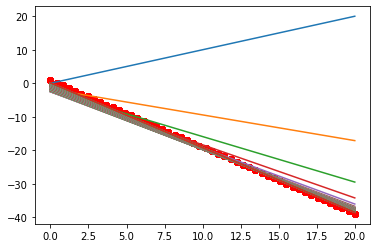

In [117]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

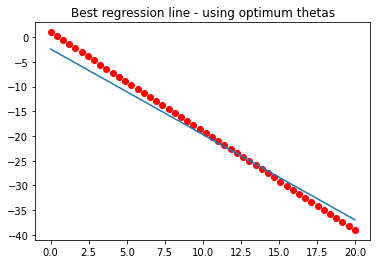

In [118]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

#### Try default learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [119]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 = RMSProp(x,y,0.1,1e-8,1000,0.98)

#### Plot loss vs. epochs

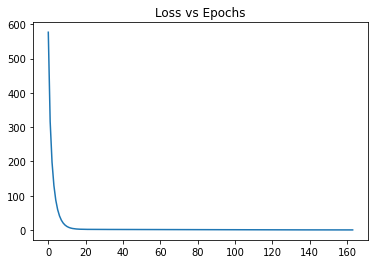

In [120]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

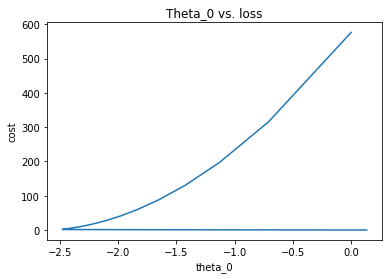

In [121]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

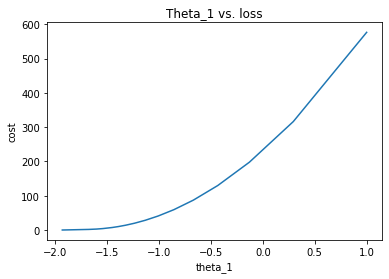

In [122]:
plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

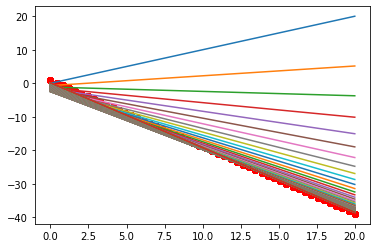

In [123]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

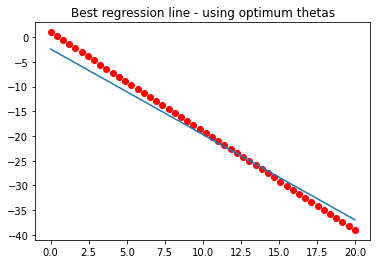

In [124]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [154]:
def Adam (x,y,learning_rate,epslon,Max_iterations,beta1,beta2):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m0=0
    m1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        m0= beta1 * m0 + (1-beta1) * (gradient0)
        v0 = beta2 *v0 + (1-beta2) * (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*m0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        m1= beta1 * m1 + (1-beta1) * (gradient1)
        v1 = beta2 * v1 + (1-beta2) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*m1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1
    

In [155]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 = Adam(x,y,0.3,1e-8,350,0.7,0.999)

#### Calculate r2 score

In [156]:
import sklearn
from sklearn.metrics import r2_score

In [157]:
sklearn.metrics.r2_score(h,y)

0.9709462452520248

In [158]:
theta0arr

[0,
 -2.8460498631170577,
 -4.607237061520117,
 -3.8273677340852936,
 -2.206816141162132,
 -1.1061603275654914,
 -1.1066802600425234,
 -1.7163752535674375,
 -2.1902416976375116,
 -2.1086245109571,
 -1.598870553211085,
 -1.054781169193957,
 -0.7800796443703031,
 -0.7982150873702669,
 -0.9196388636890984,
 -0.942750482675639,
 -0.8014567982715675,
 -0.5718665863544408,
 -0.37451633384515737,
 -0.2749133498090348,
 -0.25271526131096117,
 -0.24181163396673694,
 -0.19125408835657584,
 -0.09712320222296726,
 0.008908560261742637,
 0.093138144179334,
 0.14482260158978058,
 0.17721579165933105]

In [159]:
theta1arr

[1,
 -1.8460498918677497,
 -3.7093271157729797,
 -3.092245812493017,
 -1.6311503024871727,
 -0.7039975165339378,
 -0.8803854693335835,
 -1.6583911679318786,
 -2.298524396409289,
 -2.3803777793440233,
 -2.027052382911178,
 -1.6324535695440356,
 -1.5004626015656015,
 -1.6536602562440865,
 -1.9028197117533776,
 -2.047046209535445,
 -2.0203418747459754,
 -1.8988695021857374,
 -1.803406756169363,
 -1.7996791084620172,
 -1.8676208052444936,
 -1.9415030299868816,
 -1.9707247420199745,
 -1.9516320079916007,
 -1.9161310709683,
 -1.8981527776361877,
 -1.908673615564768,
 -1.934687343607805]

In [160]:
 lossarr

[576.6224489795919,
 3.071217119456968,
 308.34080834712165,
 144.72342112470204,
 2.476060956823701,
 88.03949495240748,
 63.05421175743896,
 2.269127862122519,
 20.614215517155632,
 26.40053376332463,
 4.129407095510096,
 3.656711438339229,
 9.497772531423518,
 3.4672025662040373,
 0.6130211595716317,
 2.9501922480120273,
 2.016940999138869,
 0.33452835115635476,
 0.8453266674075169,
 0.9613131470188466,
 0.30651806038818796,
 0.2750800747695232,
 0.41851951350689975,
 0.2287388455739004,
 0.13363152733708294,
 0.18616574726013865,
 0.14636930780333793,
 0.08838944228249065]

In [161]:
harr

[array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
         6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
         8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
        10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
        12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
        14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
        16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
        18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ]),
 array([ -2.84604986,  -3.59953961,  -4.35302937,  -5.10651912,
         -5.86000887,  -6.61349862,  -7.36698837,  -8.12047813,
         -8.87396788,  -9.62745763, -10.38094738, -11.13443713,
        -11.88792688, -12.64141664, -13.39490639, -14.14839614,
        -14.

In [162]:
theta0

0.21101831673009355

In [163]:
theta1

-1.9557389916881396

#### Plot loss vs. epochs

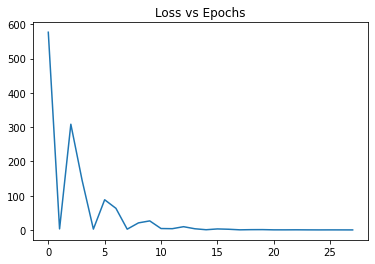

In [164]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

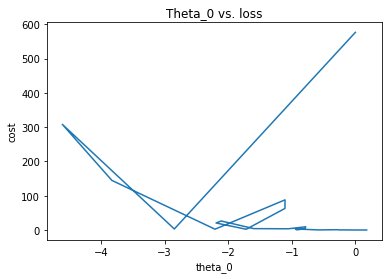

In [165]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

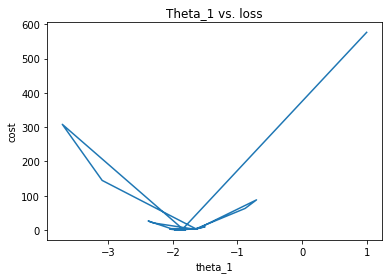

In [166]:

plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

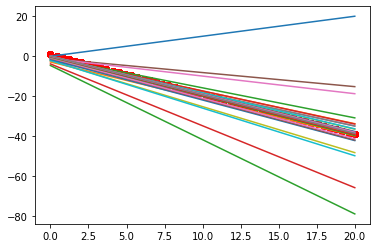

In [167]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

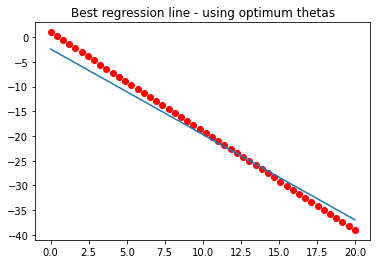

In [168]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

## Congratulations 
![image.png](attachment:image.png)